In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Будем исследовать экспоненциальное распределение с параметром $\lambda$

In [2]:
lamb = 2
expon_rv = sts.expon(lamb) # LN(1, 1)
sample = expon_rv.rvs(1000)

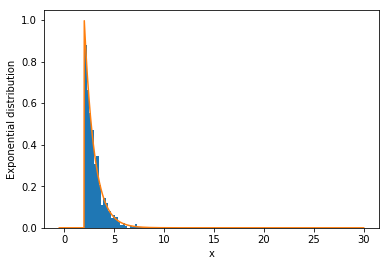

In [3]:
plt.hist(sample, bins=30, normed=True, label='Hist');

plt.xlabel('x')
plt.ylabel('Exponential distribution')

x = np.linspace(-.5,30,1000)
pdf = expon_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf');

Теперь будем проводить эксперимент n = 1, 3, 5, 10, 50, 100 раз и считать выборочное среднее для различных n. Для каждого набора экспериментов вычисляются математическое ожидание и стандартное отклонение, которые должны быть параметрами нормального распределения, к которому сходится распределение выборочного среднего. Вычисление по формулам $\mu = \frac{1}{\lambda}$ и $\sigma = \frac{1}{\sqrt{n}\lambda}$

In [4]:
n = [1, 3, 5, 10, 50, 100]

all_means = []
for ni in n:
    means = []
    for i in range(1000):
        expon_rv = sts.expon(0, 1/lamb) # LN(1, 1)
        sample = expon_rv.rvs(size=ni)
        means.append(np.mean(sample))
    all_means.append(means)

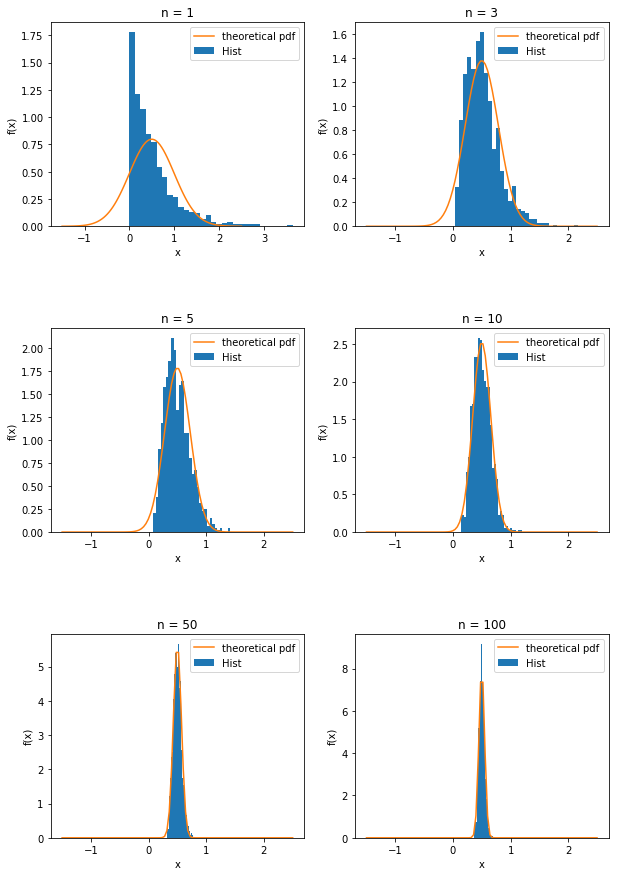

In [6]:
fig, ax = plt.subplots(3, 2, figsize=(10,15))
index = 0
for i in range(3):
    for j in range(2):

        ax[i, j].hist(all_means[index], bins=30, normed=True, label='Hist')
    
        # Calculate theoretical moments
        Emu = lamb**-1
        Esigma = lamb**-1 / n[index]**.5
        index += 1
        
        norm_rv = sts.norm(Emu, Esigma) # N(Emu, Esigma)

        x = np.linspace(-1.5,2.5,100)
        pdf = norm_rv.pdf(x)
        ax[i, j].plot(x, pdf, label='theoretical pdf')
        ax[i, j].set_title('n = '+str(n[index-1]))
        ax[i, j].set_xlabel('x')
        ax[i, j].set_ylabel('f(x)')
        ax[i, j].legend()
        
fig.subplots_adjust(hspace=0.5)

Видно, что чем больше n, тем лучше распределение выборочного среднего становится распределенным нормально, что совпадает с утверждением ЦПТ.